In [1]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

warnings.simplefilter(action='ignore', category=FutureWarning)

def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [2]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [136]:
y6_summary_dict = {
    'iteration': [],
    'n_features': [],
    'score': [],
    'weights': [],
    'features': [],
    'total_loss': [], 
    'zero_loss': [], 
    'orbit_loss': [],
    'exit_orbit_loss': []
}

for i in tqdm.tqdm(range(25)):
    FOLDER = f"data/learning_storage/orbit_supression_2/Y6_sfs1_it{i}"

    tmp = gather_data3(FOLDER, True)
    tmp_sorted = tmp.sort_values(by = ['total_loss'])
    
    y6_summary_dict['iteration'].append(i)
    y6_summary_dict['n_features'].append(len(tmp_sorted.features_ids.values[0]))
    y6_summary_dict['score'].append(tmp_sorted.score.values[0])
    y6_summary_dict['weights'].append(tmp_sorted.weights.values[0])
    y6_summary_dict['features'].append(tmp_sorted.features_ids.values[0])
    y6_summary_dict['total_loss'].append(tmp_sorted.total_loss.values[0]) 
    y6_summary_dict['zero_loss'].append(tmp_sorted.zero_loss.values[0])
    y6_summary_dict['orbit_loss'].append(tmp_sorted.orbit_loss.values[0])
    y6_summary_dict['exit_orbit_loss'].append(tmp_sorted.exit_orbit_loss.values[0])
    
#    print(tmp_sorted.features_ids.values[0])
#    print(list(tmp_sorted.weights.values[0].ravel()))

y6_summary = pd.DataFrame(y6_summary_dict)

y6_summary['problem_loss'] = y6_summary.total_loss - y6_summary.orbit_loss - y6_summary.zero_loss - y6_summary.exit_orbit_loss

print(y6_summary)

100%|██████████| 25/25 [00:00<00:00, 32.48it/s]

    iteration  n_features     score  \
0           0           3  0.468513   
1           1           4  0.467336   
2           2           5  0.464128   
3           3           6  0.514860   
4           4           7  0.584377   
5           5           8  0.634488   
6           6           9  0.666700   
7           7          10  0.714034   
8           8          11  0.751803   
9           9          12  0.787709   
10         10          13  0.820648   
11         11          14  0.853597   
12         12          15  0.895472   
13         13          16  0.937400   
14         14          17  0.955342   
15         15          18  0.963272   
16         16          19  0.957008   
17         17          20  0.958542   
18         18          21  0.959996   
19         19          22  0.962567   
20         20          23  0.964387   
21         21          24  0.967668   
22         22          25  0.968417   
23         23          26  0.968354   
24         24          27

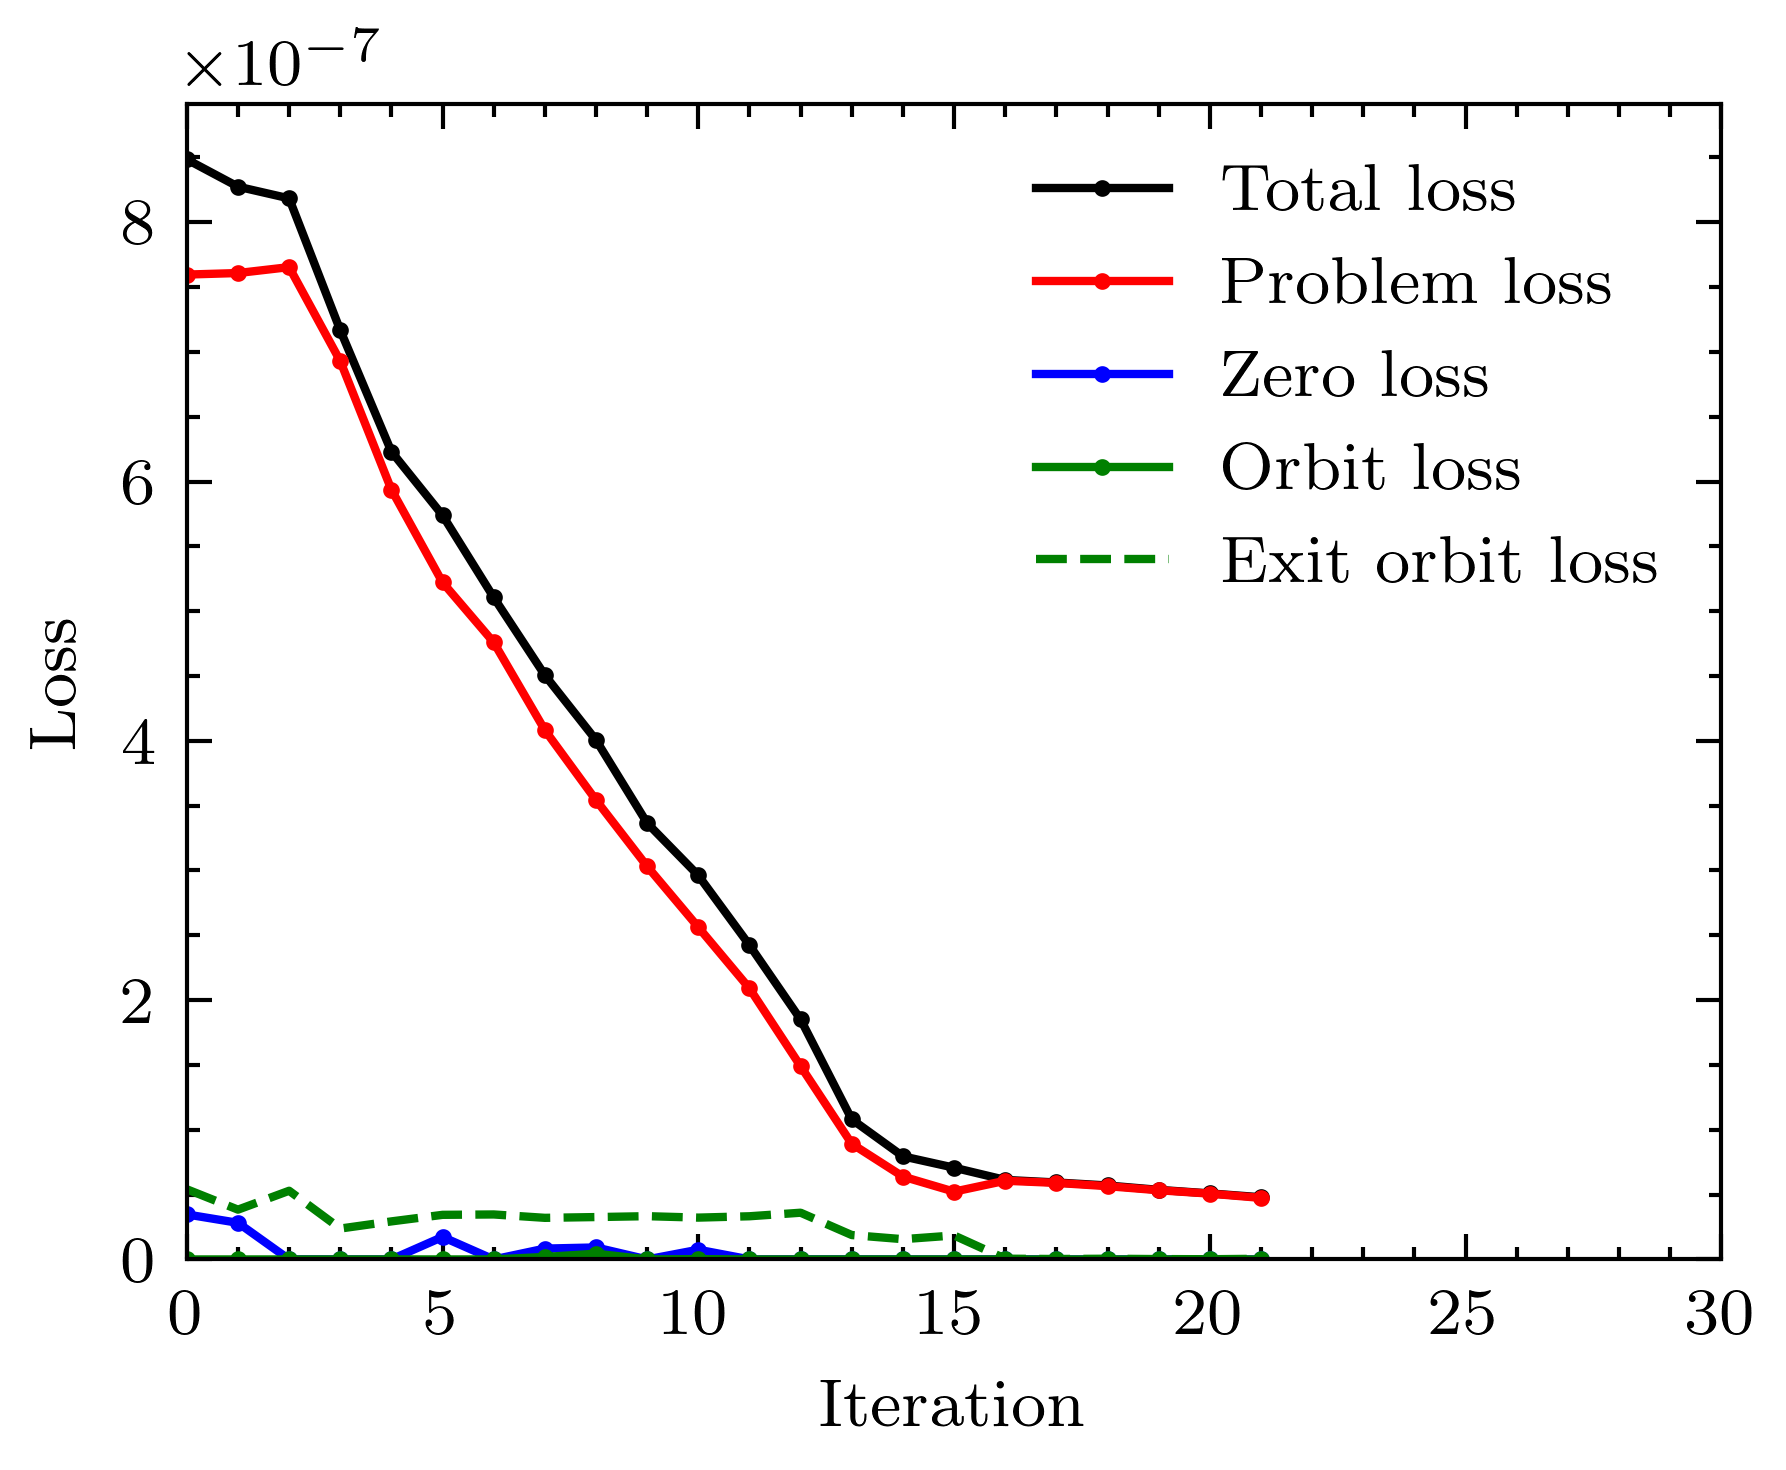

In [128]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y6_summary.iteration, y6_summary.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")
    plt.plot(y6_summary.iteration, y6_summary.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y6_summary.iteration, y6_summary.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(y6_summary.iteration, y6_summary.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(y6_summary.iteration, y6_summary.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")


    plt.xlim(0, 30)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

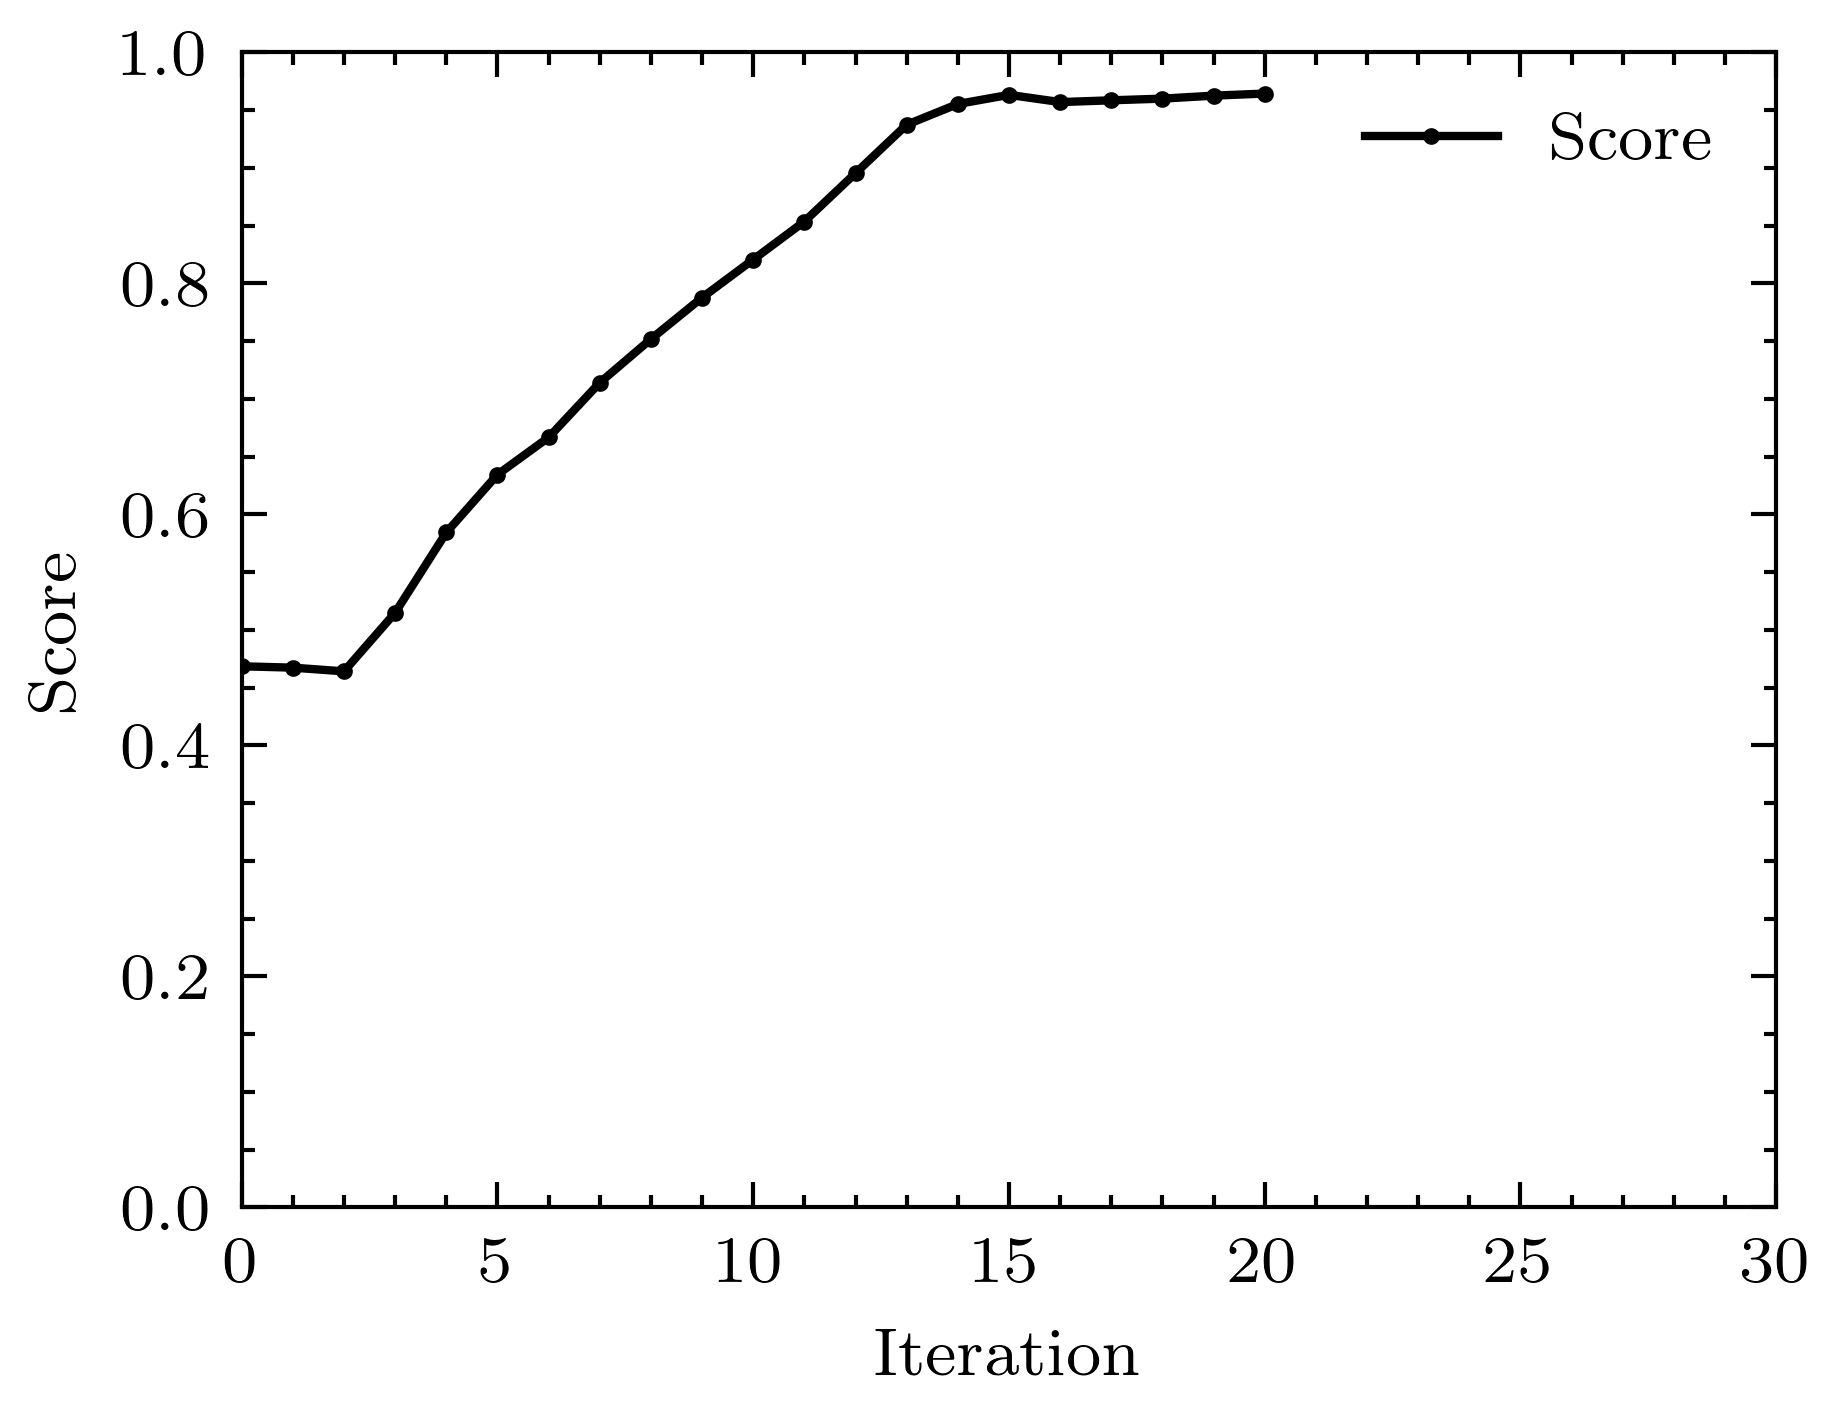

In [120]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y6_summary.iteration, y6_summary.score, '-o', markersize = 1.0, label = "Score", color = "black")
    
    plt.xlim(0, 30)
    plt.ylim(0.0, 1.0)
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()

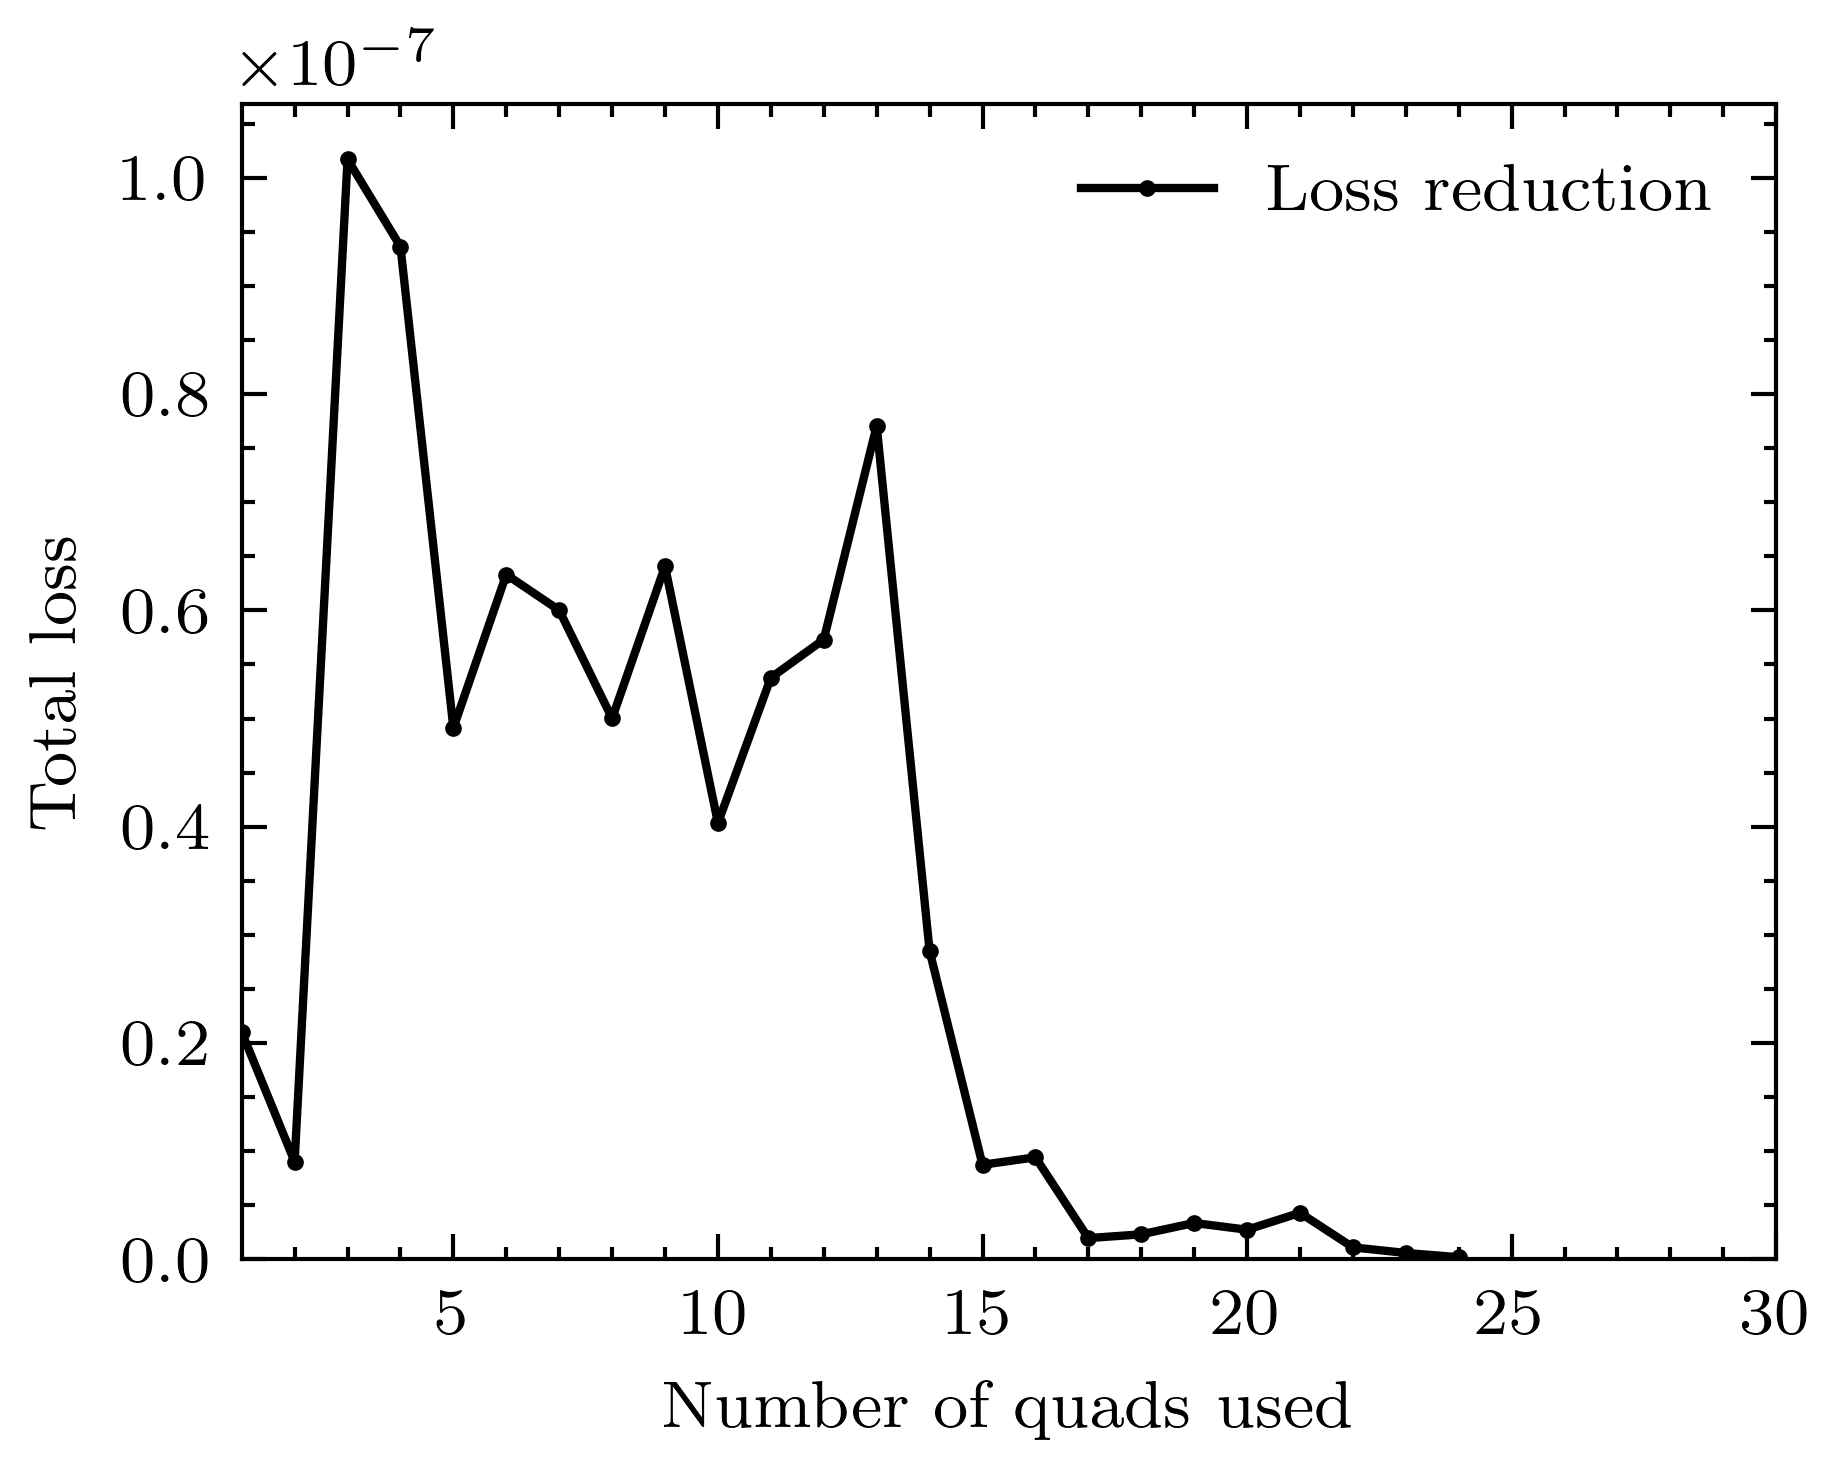

In [140]:
# plotting the dependance of the loss decrese as the function of the number of quads used

loss_reduction = []

for i in range(1, len(y6_summary.total_loss)):
    loss_reduction.append(y6_summary.total_loss[i - 1] - y6_summary.total_loss[i])
    
with plt.style.context(['science', 'ieee']):
    plt.plot(range(1, len(y6_summary.total_loss)), loss_reduction, '-o', markersize = 1.0, label = "Loss reduction", color = "black")

    plt.xlim(1, 30)
    plt.ylim(0, )
    
    plt.legend()
    plt.xlabel("Number of quads used")
    plt.ylabel("Total loss")
    plt.show()

In [95]:
import placetmachine as pl

In [96]:
# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [137]:
knobs_setup = {
    "Y6": f"data/learning_storage/orbit_supression_2/Y6_sfs1_it20",
}

In [131]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
        print(list(weights), features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [138]:
knobs = construct_knobs()
for knob in knobs:
    print(knob)


[1.007775, -1.0060145, -23.89543, -11.346015, -24.16606, -4.691198, -10.451449, -1.0043415, -1.7761153, 22.075333, -16.784285, 29.727722, -18.901419, -7.284757, 1.8254659, 15.494361, -9.863385, 11.994422, -1.315509, -1.9800675, 1.9732033, 2.7335136, -0.9997426] [2061, 2062, 1689, 2059, 1693, 1705, 2044, 1748, 1623, 1569, 2029, 1595, 1539, 1606, 1666, 1907, 1535, 1895, 2058, 1669, 1732, 1517, 1509]
   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1481  3466.28456  0.0   1.007775  0.0  0.0
1        Quadrupole    1485  3475.65118  0.0  -1.006014  0.0  0.0
2        Quadrupole     281   655.67860  0.0 -23.895430  0.0  0.0
3        Quadrupole    1473  3447.55132  0.0 -11.346015  0.0  0.0
4        Quadrupole     289   674.41184  0.0 -24.166059  0.0  0.0
5        Quadrupole     313   730.61156  0.0  -4.691198  0.0  0.0
6        Quadrupole    1413  3307.05202  0.0 -10.451449  0.0  0.0
7        Quadrupole     399   931.99389  0.0  -1.004341  0.0  0.0
8    

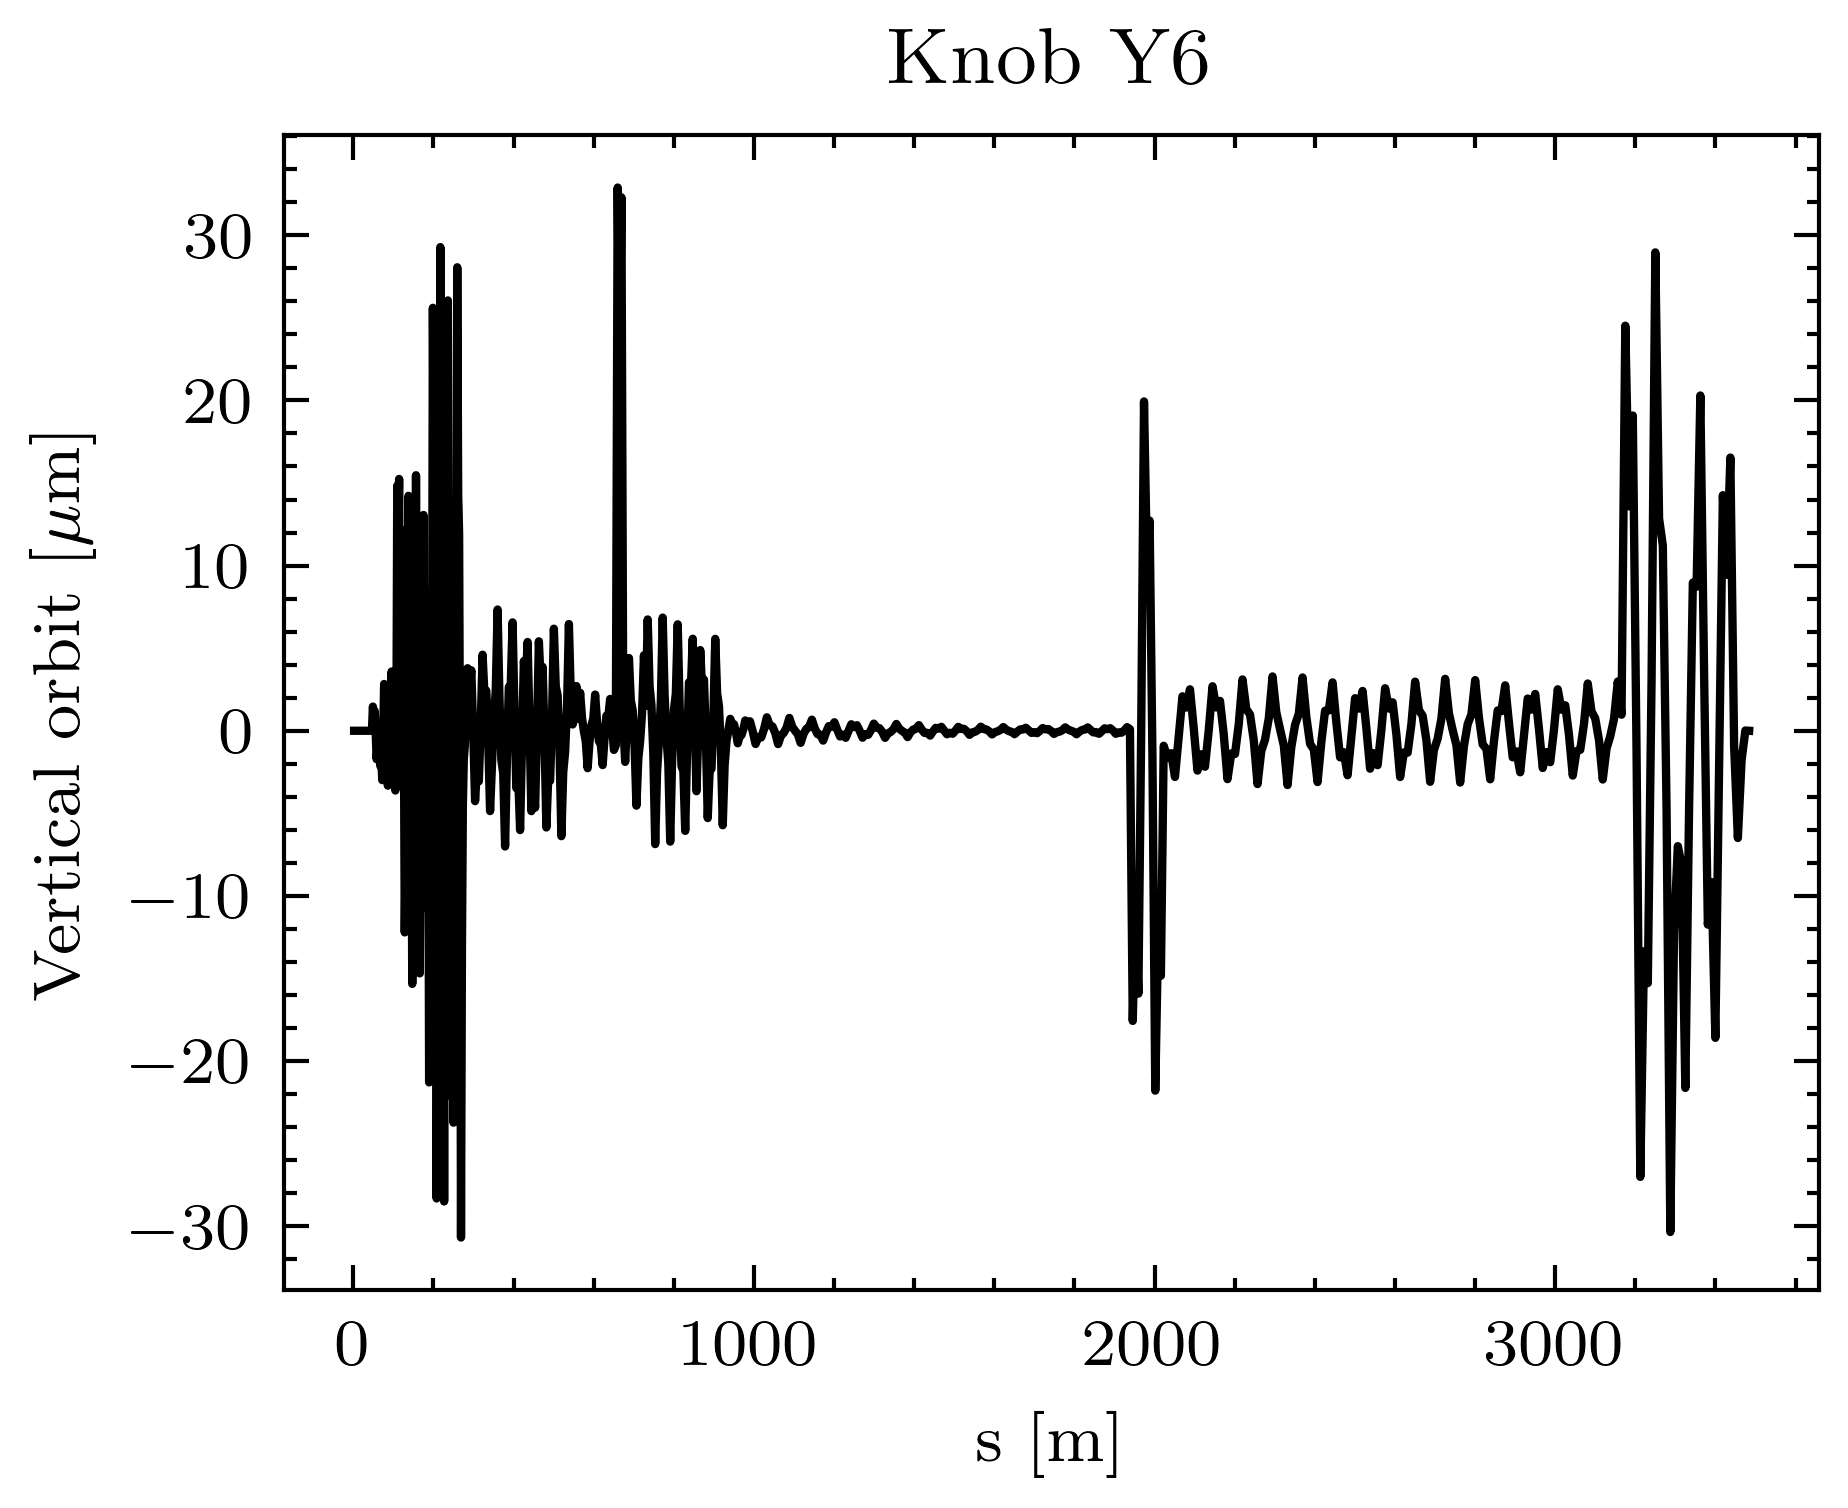

The last 2 BPMs orbit 14.7263 nm and -1.13448 nm


In [139]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y6")
    plt.plot(beam_orbit.s, beam_orbit.y, '-', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
#    plt.xlim(3000,)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")